In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

In [2]:
df = pd.read_csv("clicks.csv", dtype={"source_id":"int8", "advertiser_id":"int8"})

In [3]:
df.dtypes

advertiser_id         int8
action_id          float64
source_id             int8
created             object
country_code         int64
latitude           float64
longitude          float64
wifi_connection       bool
carrier_id         float64
trans_id            object
os_minor           float64
agent_device       float64
os_major           float64
specs_brand          int64
brand              float64
timeToClick        float64
touchX             float64
touchY             float64
ref_type             int64
ref_hash             int64
dtype: object

In [4]:
df.head(2)

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666


In [5]:
df.isnull().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [6]:
clicksPosition = df[["touchX", "touchY"]]
clicksPosition.head()

,touchX,touchY
0,0.905,0.078
1,NaN,NaN
2,0.946,0.473
3,0.035,0.431
4,0.054,0.423


In [7]:
clicksPosition = clicksPosition.dropna()

In [11]:
clicksPosition['touchY'].max()

16.6

In [12]:
from scipy.stats import gaussian_kde
xPosition = clicksPosition["touchX"].values
yPosition = clicksPosition["touchY"].values

xy = np.vstack([xPosition,yPosition])
z = gaussian_kde(xy)(xy)

# Densidad de clicks en la pantalla.
### No tiene sentido que la resolución de la pantalla me de en teoría de 16/1 cuando suelen ser de 16/9 ( ÉSTO YA LO PREGUNTÉ, ESTOY ESPERANDO RESPUESTA )

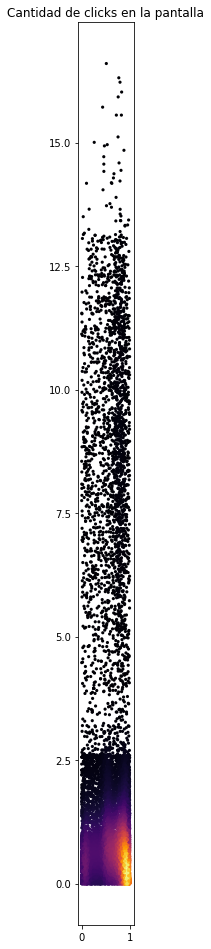

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(xPosition.max(), yPosition.max()))
plt.title("Cantidad de clicks en la pantalla")
ax.scatter(xPosition, yPosition, c=z, cmap="inferno", s=10, edgecolor="");

In [14]:
df["country_code"].value_counts()

6333597102633388268    26351
Name: country_code, dtype: int64

### Ploteo del tiempo que tardan el clickear ( PREGUNTAR POR QUÉ HAY TIEMPOS DE 17000 SEGUNDOS )

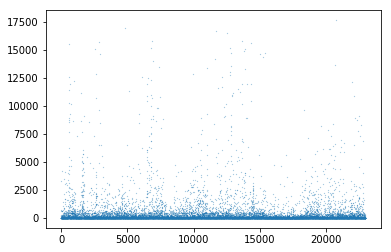

In [15]:
time = df["timeToClick"].values
time = time[~np.isnan(time)]
plt.plot(time, ".", markersize=0.3);

### Saqué la media para ver en dónde se ubicaba y sigue siendo alta ( 200 segundos aprox. )

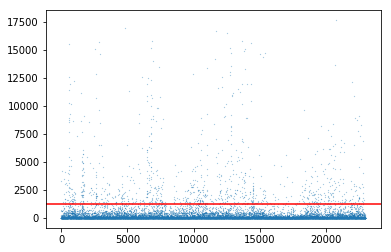

In [16]:
timeStd = np.std(time)
filterTime = time[np.where(time < np.mean(time) + timeStd)]
plt.plot(time, ".", markersize=0.3)
plt.axhline(y=max(filterTime), color="red")

In [17]:
max(filterTime)

1203.858

In [18]:
time.max()

17616.188000000002

In [19]:
df["timeToClick"].min()

0.017

# Ploteo de los segundos que tardan en hacer clicks en escala logarítmica.

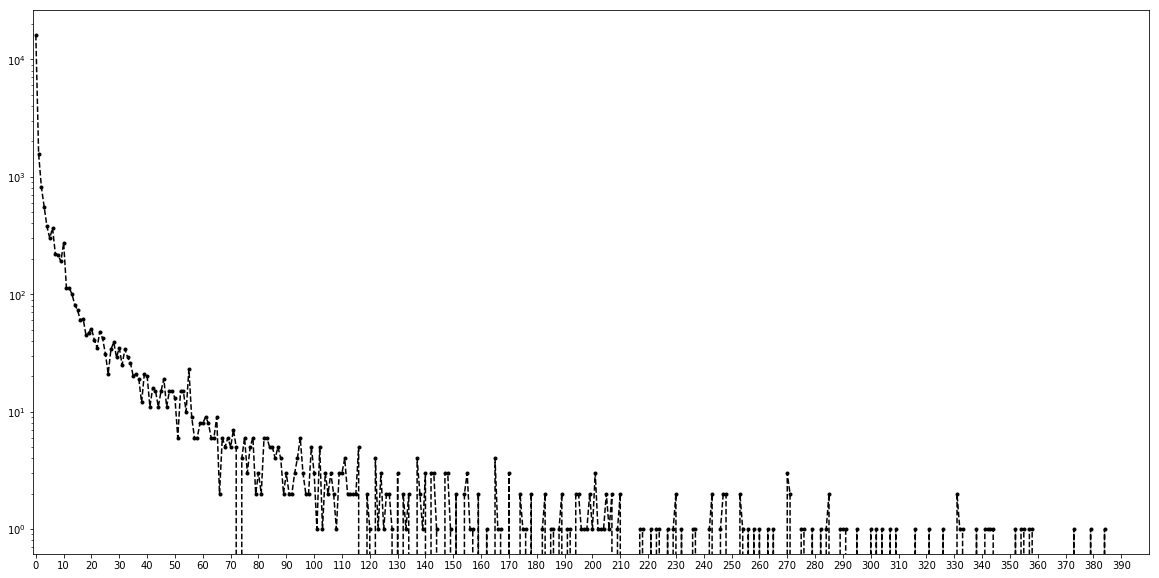

In [21]:
# Figure
fig, ax = plt.subplots(figsize=(20,10))

# Data
N = 400
m = max(time)/N
cantidad_time = []
for n in range(N):
    temp_var = time[np.where(time > n*m)]
    temp_var = temp_var[np.where(temp_var < (n + 1)*m)]
    cantidad_time.append(len(temp_var))

# Axes
ax.set_xticks(np.arange(0,N,10))
ax.set_xlim([-1,N])

# Plot
plt.plot(cantidad_time, "--.k")
plt.yscale("log")


### Podemos ver cómo los datos a partir del 60 se va todo a la mierda.

In [22]:
advertiserID = pd.DataFrame(df["advertiser_id"])

In [23]:
advertiserID["cantidad"] = 1
advertiser_plot = advertiserID.groupby("advertiser_id").agg({"cantidad":"count"})

In [34]:
advertiser_plot

,cantidad
advertiser_id,
0,70
1,2
2,12
3,26263
5,1
7,2
8,1


# Advertiser ID = Internal id for the advertiser, Jampp's client paying for the ad
### No sé si tiene sentido éste ploteo porque son la mayoría del número 3.

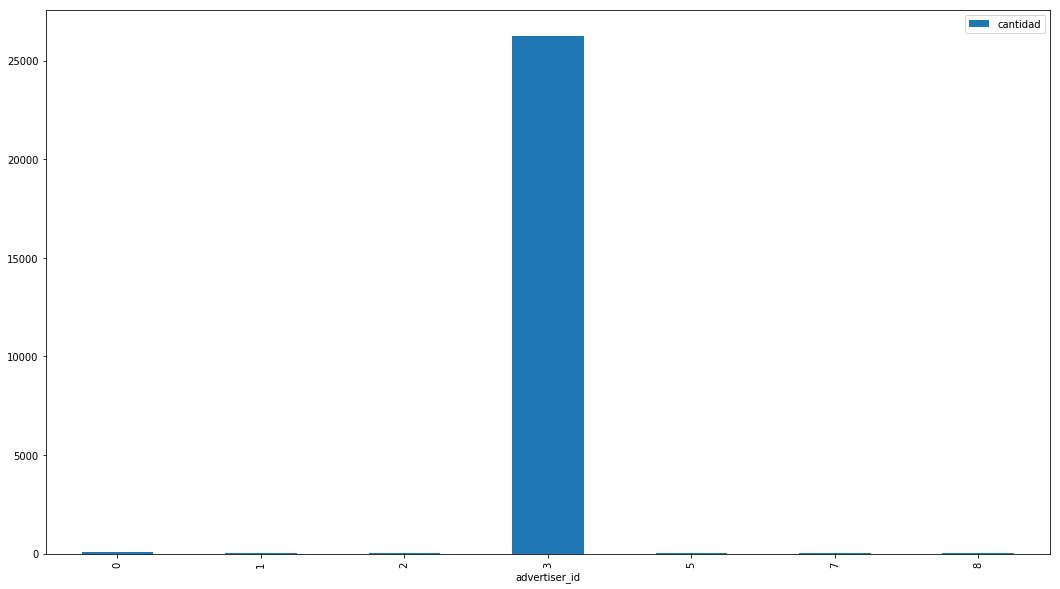

In [33]:
advertiser_plot.plot(kind="bar", figsize=(18,10));

In [23]:
latitude = df["latitude"].values
longitude = df["longitude"].values

In [24]:
lat_long = np.vstack([latitude,longitude])
z = gaussian_kde(lat_long)(lat_long)

# Dónde se producen la mayor cantidad de clicks por longitud y latitud
### Tampoco sé si tiene sentido porque tiene una TL de por medio.

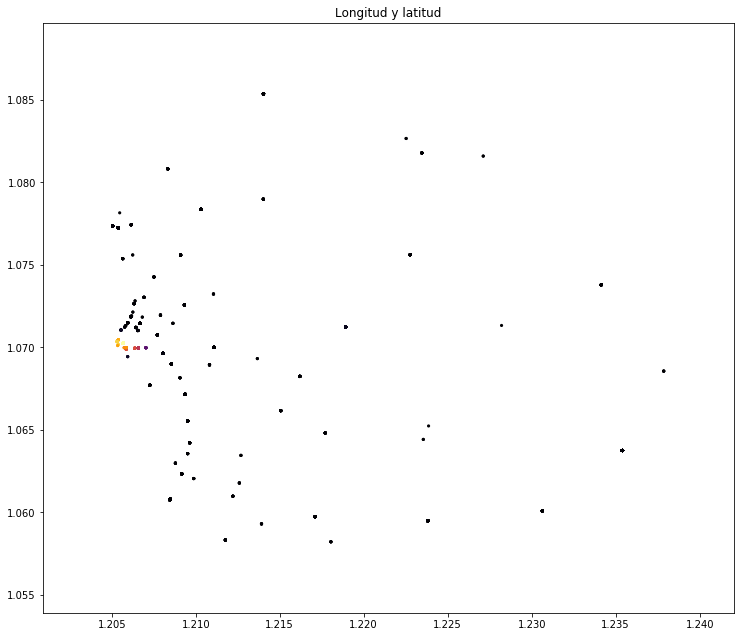

In [25]:
n = 10
fig, ax = plt.subplots(figsize=(n*latitude.max(), n*longitude.max()))
plt.title("Longitud y latitud")
ax.scatter(latitude, longitude, c=z, cmap="inferno", s=10, edgecolor="");